<h2>Nithin Kodipyaka</h2>

GRIP: The Sparks Foundation

Prediction using Supervised ML

In [60]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [61]:
# Reading data from remote link
data = "http://bit.ly/w-data"
df = pd.read_csv(data)
print("Data imported successfully")

df.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


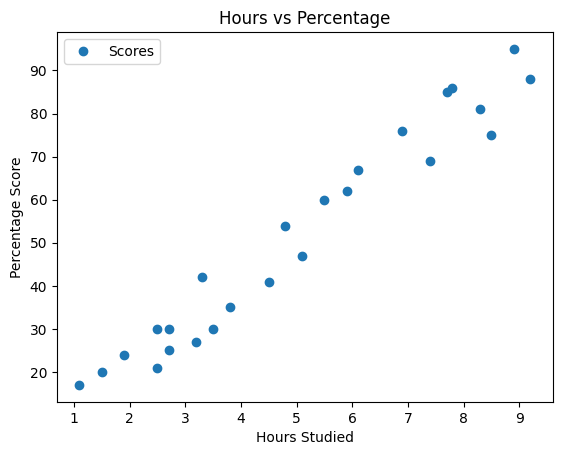

In [62]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [63]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0)


In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")


Training complete.


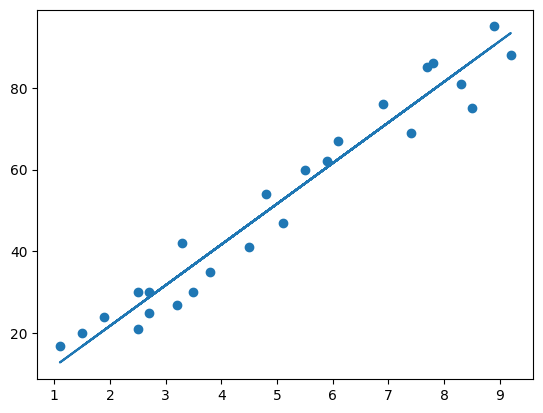

In [87]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()


In [88]:
print(X_test)  # Testing data - In Hours
y_pred = regressor.predict(X_test)  # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [89]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction


,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [90]:
own_pred = regressor.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/day is",own_pred[0])

The predicted score if a student studies for 9.25 hrs/day is 93.89272889341655


In [91]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2_score = metrics.r2_score(y_test,y_pred)

print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)
print("Root Mean Squared Error: ",RMSE)
print("R2 score: ",R2_score)

Mean Absolute Error:  4.130879918502486
Mean Squared Error:  20.33292367497997
Root Mean Squared Error:  4.5092043283688055
R2 score:  0.9367661043365055
